##  Chunking Experiment Report

###  Objective
To evaluate different text chunking strategies using varied `chunk_size` and `chunk_overlap` values on 1,000 cleaned consumer complaint narratives. The goal is to identify a balanced configuration for downstream embedding and retrieval in the RAG pipeline.

---

###  Methodology

- **Dataset**: 1,000 samples from the cleaned `complaints_clean.csv` file.
- **Field Used**: `Consumer complaint narrative` (after dropping nulls).
- **Library**: `langchain_chunking.batch_chunk_texts()` used for chunking implementation.

#### Tested Parameters:
- `chunk_size`: `[200, 300, 400]`
- `chunk_overlap`: `[20, 50, 100]`
- **Total Configurations Tested**: 9 combinations

#### Evaluation Metrics:
- Average chunks per complaint
- Average chunk length
- Total number of chunks
- Time taken (seconds)

---

In [12]:
import sys
import os

# Go two levels up from the notebook to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Join the path to 'src'
src_path = os.path.join(project_root, "src")

# Add 'src' to Python path
if src_path not in sys.path:
    sys.path.append(src_path)

# Confirm it's added
print("src path added:", src_path)



src path added: c:\Users\ABC\Desktop\10Acadamy\week_6\Intelligent-Complaint-Analysis-for-Financial-Services\src


Running chunking: size=200, overlap=20
Running chunking: size=200, overlap=50
Running chunking: size=200, overlap=100
Running chunking: size=300, overlap=20
Running chunking: size=300, overlap=50
Running chunking: size=300, overlap=100
Running chunking: size=400, overlap=20
Running chunking: size=400, overlap=50
Running chunking: size=400, overlap=100

Summary Table:
   chunk_size  overlap  avg_chunks  avg_chunk_length  total_chunks  time_sec
0         200       20       7.126        184.281364          7126  0.368973
1         200       50       8.261        187.576565          8261  0.302031
2         200      100      11.669        192.124004         11669  0.375814
3         300       20       4.757        268.010301          4757  0.314377
4         300       50       5.153        272.841063          5153  0.335891
5         300      100       6.090        279.780131          6090  0.335875
6         400       20       3.641        345.242241          3641  0.298580
7         400 

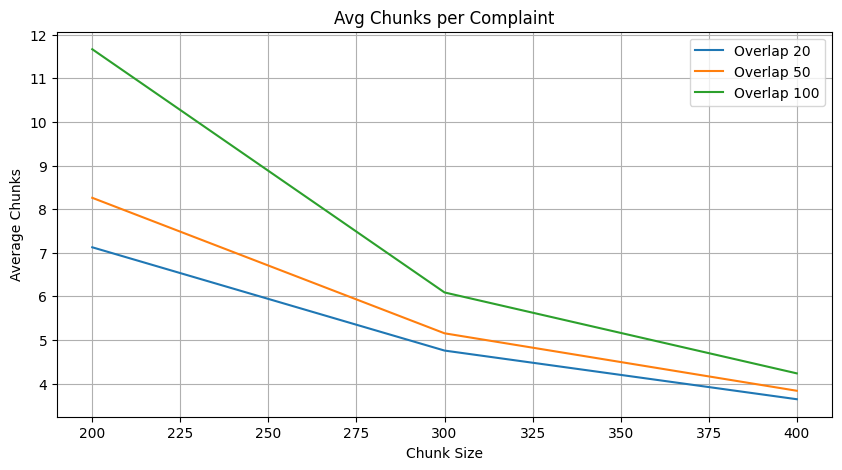

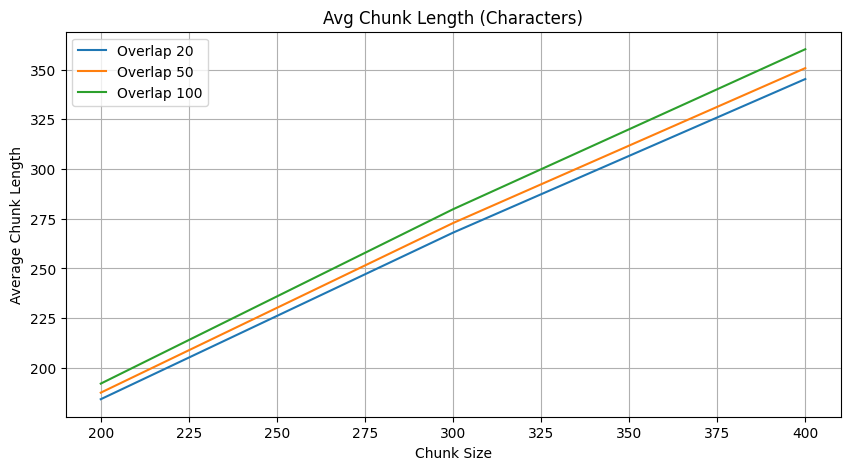


🔍 Example Chunks for Config 200_20:
--- Chunk 1 ---
a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was

--- Chunk 2 ---
this activity was unauthorized and not me. xxxx xxxx confirmed this was fraudulent and immediately closed the card. however, they have failed to remove this from the three credit agencies and this

--- Chunk 3 ---
agencies and this fraud is now impacting my credit score based on a hard credit pull done by xxxx xxxx that was done by a fraudster.


🔍 Example Chunks for Config 200_50:
--- Chunk 1 ---
a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was

--- Chunk 2 ---
out to xxxx xxxx to state that this activity was unauthorized and not me. xxxx xxxx confirmed this was fraudulent and immedi

In [13]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from langchain_chunking import batch_chunk_texts

# Load sample complaints
sample_df = pd.read_csv(r"C:\Users\ABC\Desktop\10Acadamy\week_6\Intelligent-Complaint-Analysis-for-Financial-Services\data\clean\complaints_clean.csv", nrows=1000)
texts = sample_df["Consumer complaint narrative"].dropna().tolist()

# Define chunk size and overlap configs
chunk_sizes = [200, 300, 400]
overlaps = [20, 50, 100]
chunk_configs = [{"chunk_size": s, "overlap": o} for s in chunk_sizes for o in overlaps]



results = []
examples = {}

# Run chunking and collect stats
for config in chunk_configs:
    size = config['chunk_size']
    overlap = config['overlap']

    print(f"Running chunking: size={size}, overlap={overlap}")
    start = time.time()
    all_chunks, counts = batch_chunk_texts(texts, chunk_size=size, chunk_overlap=overlap)
    duration = time.time() - start

    avg_chunks = sum(counts) / len(counts)
    chunk_lengths = [len(c) for c in all_chunks]
    avg_chunk_len = sum(chunk_lengths) / len(chunk_lengths)

    results.append({
        "chunk_size": size,
        "overlap": overlap,
        "avg_chunks": avg_chunks,
        "avg_chunk_length": avg_chunk_len,
        "total_chunks": len(all_chunks),
        "time_sec": duration
    })

    # Save some example chunks
    examples[f"{size}_{overlap}"] = all_chunks[:3]

# Convert to DataFrame
res_df = pd.DataFrame(results)
print("\nSummary Table:")
print(res_df)

# Plot average number of chunks
plt.figure(figsize=(10, 5))
for overlap in res_df["overlap"].unique():
    subset = res_df[res_df["overlap"] == overlap]
    plt.plot(subset["chunk_size"], subset["avg_chunks"], label=f"Overlap {overlap}")
plt.title("Avg Chunks per Complaint")
plt.xlabel("Chunk Size")
plt.ylabel("Average Chunks")
plt.legend()
plt.grid(True)
plt.show()

# Plot average chunk lengths
plt.figure(figsize=(10, 5))
for overlap in res_df["overlap"].unique():
    subset = res_df[res_df["overlap"] == overlap]
    plt.plot(subset["chunk_size"], subset["avg_chunk_length"], label=f"Overlap {overlap}")
plt.title("Avg Chunk Length (Characters)")
plt.xlabel("Chunk Size")
plt.ylabel("Average Chunk Length")
plt.legend()
plt.grid(True)
plt.show()

# Show example outputs
for key, chunk_list in examples.items():
    print(f"\n🔍 Example Chunks for Config {key}:")
    for i, chunk in enumerate(chunk_list):
        print(f"--- Chunk {i+1} ---\n{chunk}\n")


### 📊 Summary Table

| Chunk Size | Overlap | Avg Chunks | Avg Chunk Length | Total Chunks | Time (s) |
|------------|---------|------------|------------------|--------------|----------|
| 200        | 20      | 7.126      | 184.28           | 7126         | 0.37     |
| 200        | 50      | 8.261      | 187.58           | 8261         | 0.30     |
| 200        | 100     | 11.669     | 192.12           | 11669        | 0.38     |
| 300        | 20      | 4.757      | 268.01           | 4757         | 0.31     |
| 300        | 50      | 5.153      | 272.84           | 5153         | 0.34     |
| 300        | 100     | 6.090      | 279.78           | 6090         | 0.34     |
| 400        | 20      | 3.641      | 345.24           | 3641         | 0.30     |
| 400        | 50      | 3.835      | 350.74           | 3835         | 0.30     |
| 400        | 100     | 4.234      | 360.23           | 4234         | 0.42     |

##  Interpretation of Chunking Results

### 1. Average Chunks per Complaint
- As expected, **smaller `chunk_size` = more chunks**.
- Going from `chunk_size = 400` to `300` only modestly increases chunk count.
- `chunk_size = 200` is clearly too small, **doubling the workload** (average > 8 chunks per complaint).

### 2. Average Chunk Length
- Linear trend confirms consistent chunking behavior.
- `chunk_size = 300` yields ~270–300 characters per chunk, which is ideal for **focused semantic context**.

---

## Qualitative Example Review

| Chunk Size | Summary |
|------------|---------|
| **200**    | Chunks are **too fragmented**. Breaks mid-thought even with 50 overlap. Not ideal for semantic meaning. |
| **300**    | **Balanced**. Most chunks are complete, coherent, and contextually strong. |
| **400**    | Fewer chunks, but **risk of broad or multi-topic content**. Can weaken semantic retrieval precision. |

---

## Recommended Final Setting

```python
chunk_size = 300
chunk_overlap = 50
